## Data Inspection and Pre-processing

Data preprocessing is an integral step in Machine Learning as the quality of data and the useful information that can be derived from it directly affects the ability of our model to learn; therefore, it is extremely important that we preprocess our data before feeding it into our model

<div class="alert alert-block alert-warning">
    <center><b>GARBAGE IN, GARBAGE OUT</b></center>
</div>

What my plan was?

- Data cleaning
    - Checking for missing values
    - Categorical v/s Numerical Data
    - Splitting Data into Training and Test datasets
    - Feature Scaling
- Data reduction
    - Attribute selection
    - Numerosity reduction
    - Dimensionality reduction
- Data transformation
    - Aggregation
    - Normalization
    - Feature selection
    - Discreditization

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

Using the below lines to suppress warnings

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
data = pd.read_csv('vg_sales_ratings.csv')
data.head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN


The column values are analysed using the pd.info() method. It gives details about each column's datatypes and also the number of non-null values.

In [4]:
data.shape, data.columns

((16719, 16),
 Index(['Name', 'Platform', 'Year_of_Release', 'Genre', 'Publisher', 'NA_Sales',
        'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales', 'Critic_Score',
        'Critic_Count', 'User_Score', 'User_Count', 'Developer', 'Rating'],
       dtype='object'))

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16719 entries, 0 to 16718
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16717 non-null  object 
 1   Platform         16719 non-null  object 
 2   Year_of_Release  16450 non-null  float64
 3   Genre            16717 non-null  object 
 4   Publisher        16665 non-null  object 
 5   NA_Sales         16719 non-null  float64
 6   EU_Sales         16719 non-null  float64
 7   JP_Sales         16719 non-null  float64
 8   Other_Sales      16719 non-null  float64
 9   Global_Sales     16719 non-null  float64
 10  Critic_Score     8137 non-null   float64
 11  Critic_Count     8137 non-null   float64
 12  User_Score       10015 non-null  object 
 13  User_Count       7590 non-null   float64
 14  Developer        10096 non-null  object 
 15  Rating           9950 non-null   object 
dtypes: float64(9), object(7)
memory usage: 2.0+ MB


`User_Score` should be float, but is showing as object

In [6]:
data.User_Score.unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

Similarly `Rating` should be numeric to be usable for prediction

In [7]:
data.Rating.unique()

array(['E', nan, 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'], dtype=object)

<div class="alert alert-block alert-warning">
<b>ESRB Rating:</b> ESRB ratings provide information about what's in a game or app so parents and consumers can make informed choices about which games are right for their family
</div>

There are 5 ratings.

- The original ratings were RP, EC, K-A, T, M, and AO. 

- K-A was replaced by E in January 1st, 1998. 

- They added an E10+ rating in March 2nd, 2005

Mapping I have used

- EC is rated as A (5)

- E rated video games are rated A (5).

- E10+ rated video games are rated B (4).

- T rated video games are rated B15 (3).

- M rated video games are rated C (2).

- AO rated video games are rated D (1).

- RP/RP Likely M rated video games are rated (2)

In [8]:
rating_mapping = {'EC': 5, 'E': 5, 'E10+': 4, 'T': 3, 'M': 2, 'AO': 1, 'RP': 2, 'K-A': 5, 0: 0}

data['Rating'].fillna(0, inplace=True)
data['Rating'] = data['Rating'].apply(lambda x: rating_mapping[x])

In [9]:
data.loc[data['User_Score'] == 'tbd', 'User_Score'] = 0

Descriptive analysis of the dataset is performed using the pd.describe() method

In [10]:
data.describe()

,Year_of_Release,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Count,Rating
count,16450.000000,16719.000000,16719.000000,16719.000000,16719.000000,16719.000000,8137.000000,8137.000000,7590.000000,16719.000000
mean,2006.487356,0.263330,0.145025,0.077602,0.047332,0.533543,68.967679,26.360821,162.229908,2.255278
std,5.878995,0.813514,0.503283,0.308818,0.186710,1.547935,13.938165,18.980495,561.282326,2.055668
min,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000,13.000000,3.000000,4.000000,0.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000,60.000000,12.000000,10.000000,0.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000,71.000000,21.000000,24.000000,3.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,0.470000,79.000000,36.000000,81.000000,4.000000
max,2020.000000,41.360000,28.960000,10.220000,10.570000,82.530000,98.000000,113.000000,10665.000000,5.000000


__Data seems to be missing in some columns__

In [11]:
data.isna().sum()

Name                  2
Platform              0
Year_of_Release     269
Genre                 2
Publisher            54
NA_Sales              0
EU_Sales              0
JP_Sales              0
Other_Sales           0
Global_Sales          0
Critic_Score       8582
Critic_Count       8582
User_Score         6704
User_Count         9129
Developer          6623
Rating                0
dtype: int64

In [12]:
cleaned_data = data.drop(['Critic_Count', 'User_Count', 'Developer'], axis=1)
cleaned_data.isna().sum()

Name                  2
Platform              0
Year_of_Release     269
Genre                 2
Publisher            54
NA_Sales              0
EU_Sales              0
JP_Sales              0
Other_Sales           0
Global_Sales          0
Critic_Score       8582
User_Score         6704
Rating                0
dtype: int64

<div class="alert alert-block alert-success">
<b>Justification:</b> Since <i>Year_of_Release</i> has 269 missing values, my idea was to populate using the median of the Years where the same platform was used. Every platform is generally trending in certain periods. So, I planned to use those years
</div>

In [13]:
platforms = cleaned_data[cleaned_data['Year_of_Release'].isna()].Platform.unique()
platforms

array(['PS2', 'Wii', '2600', 'X360', 'GBA', 'PC', 'PS3', 'PS', 'PSP',
       'XB', 'GB', 'DS', 'GC', '3DS', 'N64', 'PSV'], dtype=object)

In [14]:
values = {}

for platform in platforms:
    values[platform] = int(cleaned_data[cleaned_data['Platform'] == platform]['Year_of_Release'].median())

values

{'PS2': 2005,
 'Wii': 2009,
 '2600': 1982,
 'X360': 2010,
 'GBA': 2003,
 'PC': 2010,
 'PS3': 2011,
 'PS': 1998,
 'PSP': 2009,
 'XB': 2004,
 'GB': 1997,
 'DS': 2008,
 'GC': 2003,
 '3DS': 2013,
 'N64': 1999,
 'PSV': 2014}

In [15]:
def year_filler(row):
    if pd.isna(row.Year_of_Release):
        return values[row.Platform]
    
    return row.Year_of_Release

cleaned_data.Year_of_Release = cleaned_data.apply(year_filler, axis=1)

cleaned_data.Year_of_Release.isna().sum()

0

In [16]:
cleaned_data.Critic_Score.fillna(cleaned_data.Critic_Score.min(), inplace=True)

cleaned_data.User_Score = cleaned_data.User_Score.astype('float64')
cleaned_data.User_Score.fillna(cleaned_data.User_Score.min(), inplace=True)
cleaned_data.isna().sum()

Name                2
Platform            0
Year_of_Release     0
Genre               2
Publisher          54
NA_Sales            0
EU_Sales            0
JP_Sales            0
Other_Sales         0
Global_Sales        0
Critic_Score        0
User_Score          0
Rating              0
dtype: int64

In [17]:
cleaned_data.dropna(subset=['Publisher'], inplace=True)
cleaned_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16665 entries, 0 to 16718
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16663 non-null  object 
 1   Platform         16665 non-null  object 
 2   Year_of_Release  16665 non-null  float64
 3   Genre            16663 non-null  object 
 4   Publisher        16665 non-null  object 
 5   NA_Sales         16665 non-null  float64
 6   EU_Sales         16665 non-null  float64
 7   JP_Sales         16665 non-null  float64
 8   Other_Sales      16665 non-null  float64
 9   Global_Sales     16665 non-null  float64
 10  Critic_Score     16665 non-null  float64
 11  User_Score       16665 non-null  float64
 12  Rating           16665 non-null  int64  
dtypes: float64(8), int64(1), object(4)
memory usage: 1.8+ MB


In [18]:
cleaned_data.Year_of_Release = cleaned_data.Year_of_Release.astype('int64')

<div class="alert alert-block alert-info">
<b> The Results... </b>
</div>

How did it go?
- Data cleaning
    - [x] Checking for missing values
        - The data has been populated for missing/non-numerical values
    - [x] Categorical v/s Numerical Data
        - Converted categorical data to numerical
    - [ ] Splitting Data into Training and Test datasets
        - Will be done later
    - [x] Feature Scaling: Feature Scaling is a technique to standardize the independent features present in the data in a fixed range. It is performed during the data pre-processing to handle highly varying magnitudes or values or units
- Data reduction
    - [ ] Attribute selection
    - [ ] Numerosity reduction
    - [ ] Dimensionality reduction
- Data transformation
    - [ ] Aggregation: Data aggregation is the process where raw data is gathered and expressed in a summary form for statistical analysis
    - [x] Normalization
        - Data was made usable by using the logarithmic convertor
    - [x] Feature selection
        - User Count and Critic Count were dropped as the data was equivalent to Ratings
    - [ ] Discreditization: Data discretization refers to a method of converting a huge number of data values into smaller ones so that the evaluation and management of data become easy

## Data Visualization

The importance of data visualization is simple: it helps people see, interact with, and better understand data. Whether simple or complex, the right visualization can bring everyone on the same page, regardless of their level of expertise.

<div class="alert alert-block alert-warning">
    <center><b>DATA VISUALIZATION IS THE LANGUAGE OF DECISION MAKING</b></center>
</div>

What my plan was?

- To analyze data in a chronological sense (by year)
    - Questions to answer:
        - How is the trend of video games over a period of time
        - Is the trend common across different geographical locations
- To visualize the prominence of Branding in video games (by publisher)
    - Questions to answer:
        - Who are the prominent players
        - How does Brand affect the ratings of video-games
- To visualize based on Genre and platform
    - Questions to answer:
        - Which genre dominates the industry
        - How many games are released in those genres
        - Does the platform play a role? PS2 vs PS4

__Correlation is a statistical measure that expresses the extent to which two variables are linearly related (meaning they change together at a constant rate)__

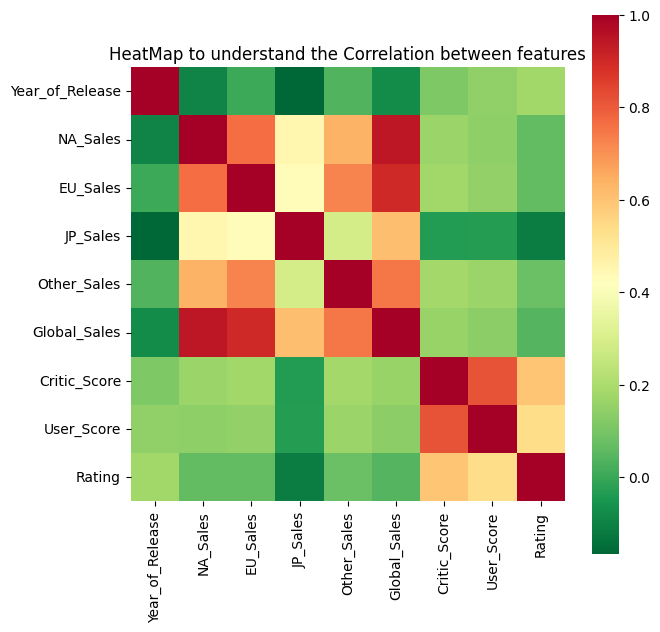

In [19]:
fig, ax = plt.subplots(figsize = (7,7))
cmap = 'RdYlGn_r'
sns.heatmap(cleaned_data.corr(numeric_only=True), square=True, cmap=cmap)
plt.title('HeatMap to understand the Correlation between features')
plt.show()

### Who are the prominent players?

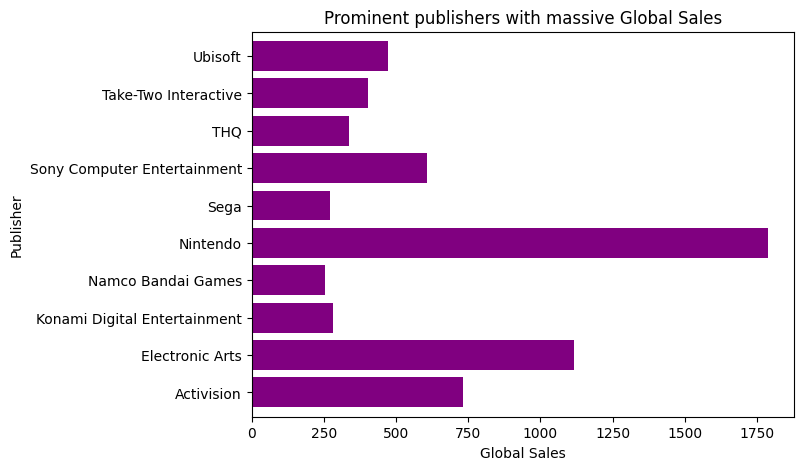

In [20]:
fig, ax = plt.subplots(figsize = (7,5))
prominent_players = cleaned_data.groupby('Publisher').Global_Sales.sum()
prominent_players = prominent_players[prominent_players > 250]

prominent_players.plot(kind='barh', color='purple', width=0.8, figsize=(7, 5))
plt.title('Prominent publishers with massive Global Sales')
plt.xlabel('Global Sales')
plt.ylabel('Publisher')
plt.show()

### How does Brand affect the ratings of video-games?

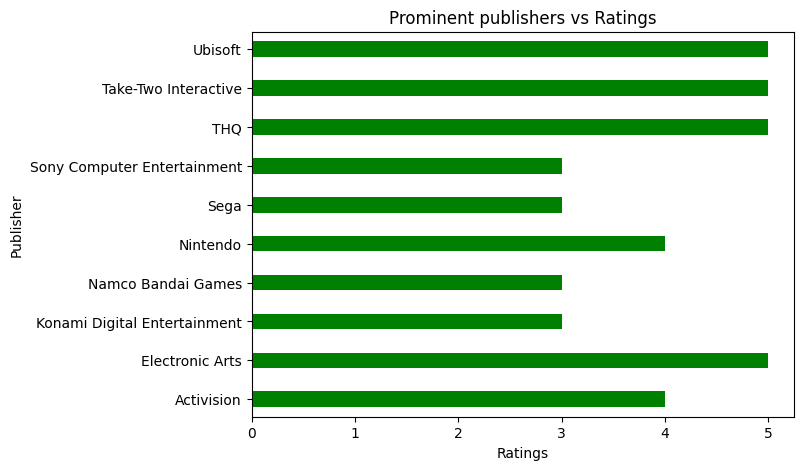

In [21]:
fig, ax = plt.subplots(figsize = (7,5))
prominent_players_ratings = cleaned_data.groupby('Publisher').Rating.quantile(0.70)
prominent_players_ratings = prominent_players_ratings[prominent_players_ratings.index.isin(prominent_players.index)]

prominent_players_ratings.plot(kind='barh', color='green', width=0.4, figsize=(7, 5))
plt.title('Prominent publishers vs Ratings')
plt.xlabel('Ratings')
plt.ylabel('Publisher')
plt.show()

<div class="alert alert-block alert-success">
There <b>might</b> be a correlation between the Publisher(Brand) and the ratings. It might be wrong or misleading. Cause and effect might be completely different.
</div>

In [22]:
year_dataset = pd.DataFrame()

for sale_type in ['NA_Sales', 'EU_Sales', 'JP_Sales']:
    sales = cleaned_data[[sale_type, 'Year_of_Release']]
    sales.insert(0, 'Type', sale_type)
    sales = sales.rename(columns={sale_type: 'Value'})
    
    year_dataset = pd.concat([year_dataset, sales])
year_dataset.head()

,Type,Value,Year_of_Release
0,NA_Sales,41.36,2006
1,NA_Sales,29.08,1985
2,NA_Sales,15.68,2008
3,NA_Sales,15.61,2009
4,NA_Sales,11.27,1996


<div class="alert alert-block alert-warning">
    <center><b>THE TREND</b></center>
</div>

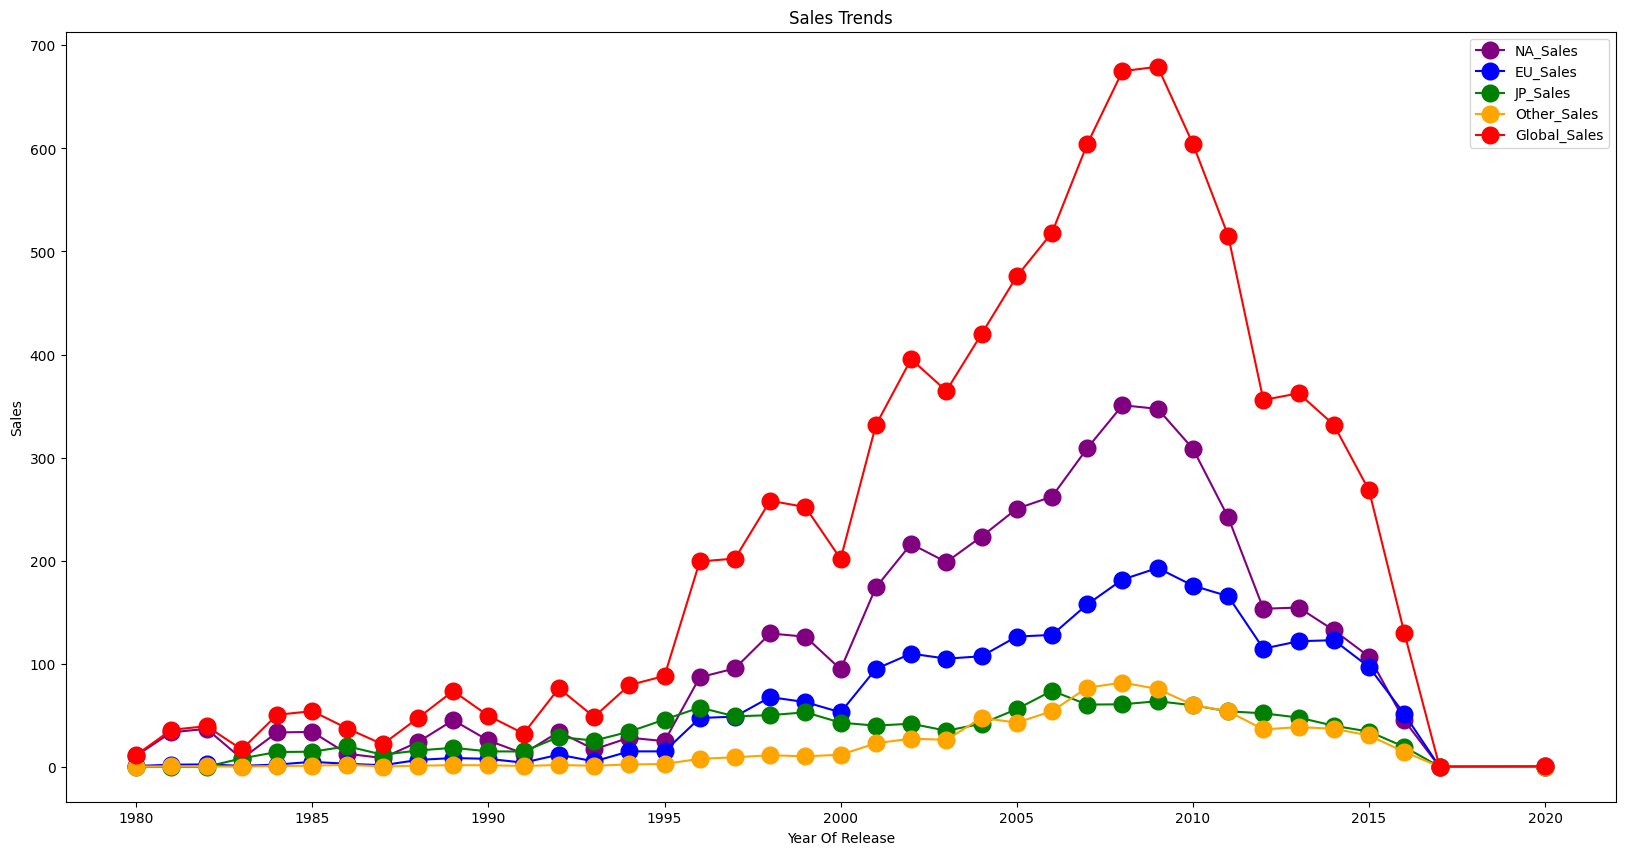

In [23]:
fig, ax = plt.subplots(figsize=(20,10))
grouped_data = cleaned_data.groupby('Year_of_Release').sum(numeric_only=True).reset_index()

columns = {'NA_Sales': 'purple', 'EU_Sales': 'blue', 'JP_Sales': 'green', 'Other_Sales': 'orange', 'Global_Sales': 'red'}

for column in columns:
    plt.plot(grouped_data['Year_of_Release'], grouped_data[column], color=columns[column], markersize=12, marker='o')

plt.title('Sales Trends')
plt.xlabel('Year Of Release')
plt.ylabel('Sales')
plt.legend(columns.keys())
plt.show()

### How is the trend of video games over a period of time?

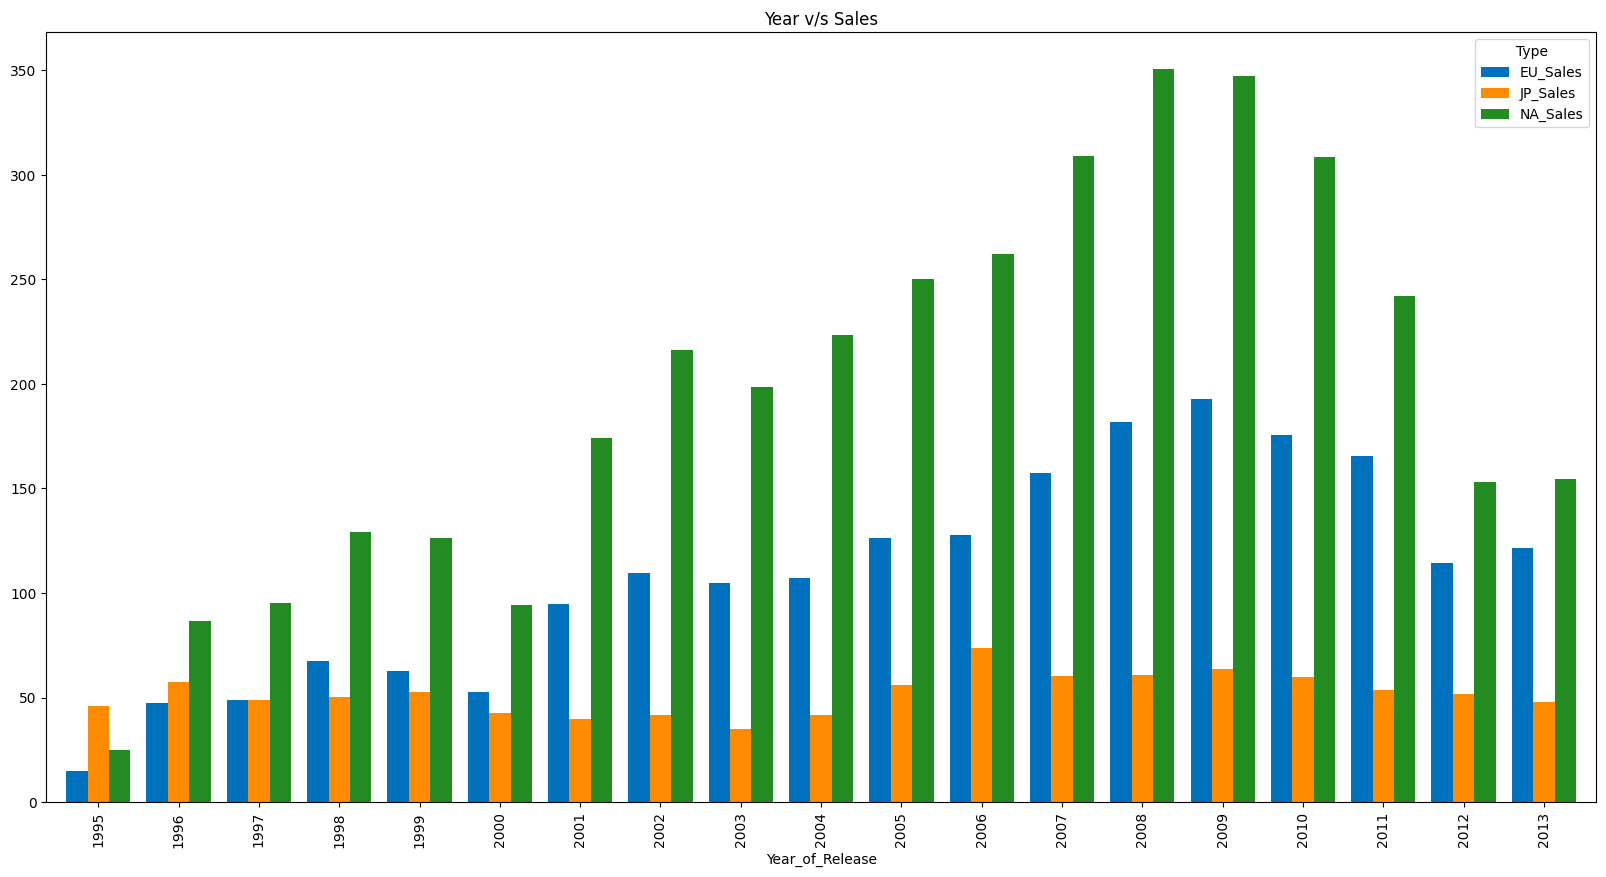

In [24]:
year_dataset = year_dataset.groupby(['Year_of_Release', 'Type']).Value.sum()
year_dataset[45:102].unstack().plot.bar(figsize=(20,10), width=0.8,color=[[0, 0.4470, 0.7410], 'darkorange', 'forestgreen'])
plt.title('Year v/s Sales')
plt.show()

<div class="alert alert-block alert-success">
<b>Observation:</b> NA region is the major market -> Any game's beta testers should be in NA :)
</div>

### How many games are released in those genres?

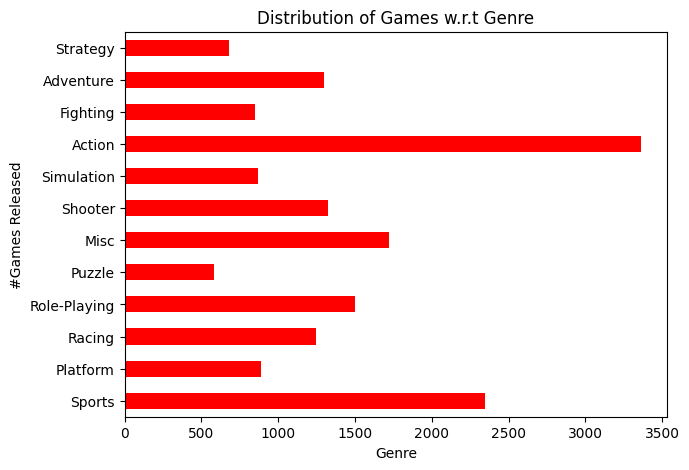

In [25]:
fig, ax = plt.subplots(figsize=(7, 5))
cleaned_data.Genre.value_counts(sort=False).plot(kind='barh', color='red')
plt.xlabel('Genre')
plt.ylabel('#Games Released')
plt.title('Distribution of Games w.r.t Genre')

plt.show()

### Does the platform play a role? PS2 vs PS4?

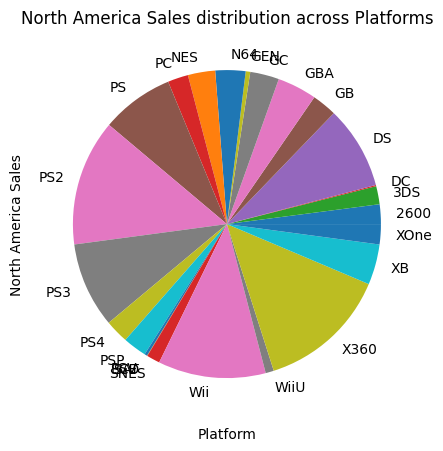

In [26]:
fig, ax = plt.subplots(figsize=(5,5))
cleaned_data.groupby('Platform').NA_Sales.sum().plot(kind='pie')
plt.title('North America Sales distribution across Platforms')
plt.xlabel('Platform')
plt.ylabel('North America Sales')
plt.show()

In [27]:
cleaned_data.drop(columns=['Name'], inplace=True)

<div class="alert alert-block alert-warning">
    <center><b>HANDLING SKEWED DATA</b></center>
</div>

In [28]:
cleaned_data['NA_Sales'].skew(), cleaned_data['NA_Sales'].kurtosis()

(18.753960023149745, 647.1201012665426)

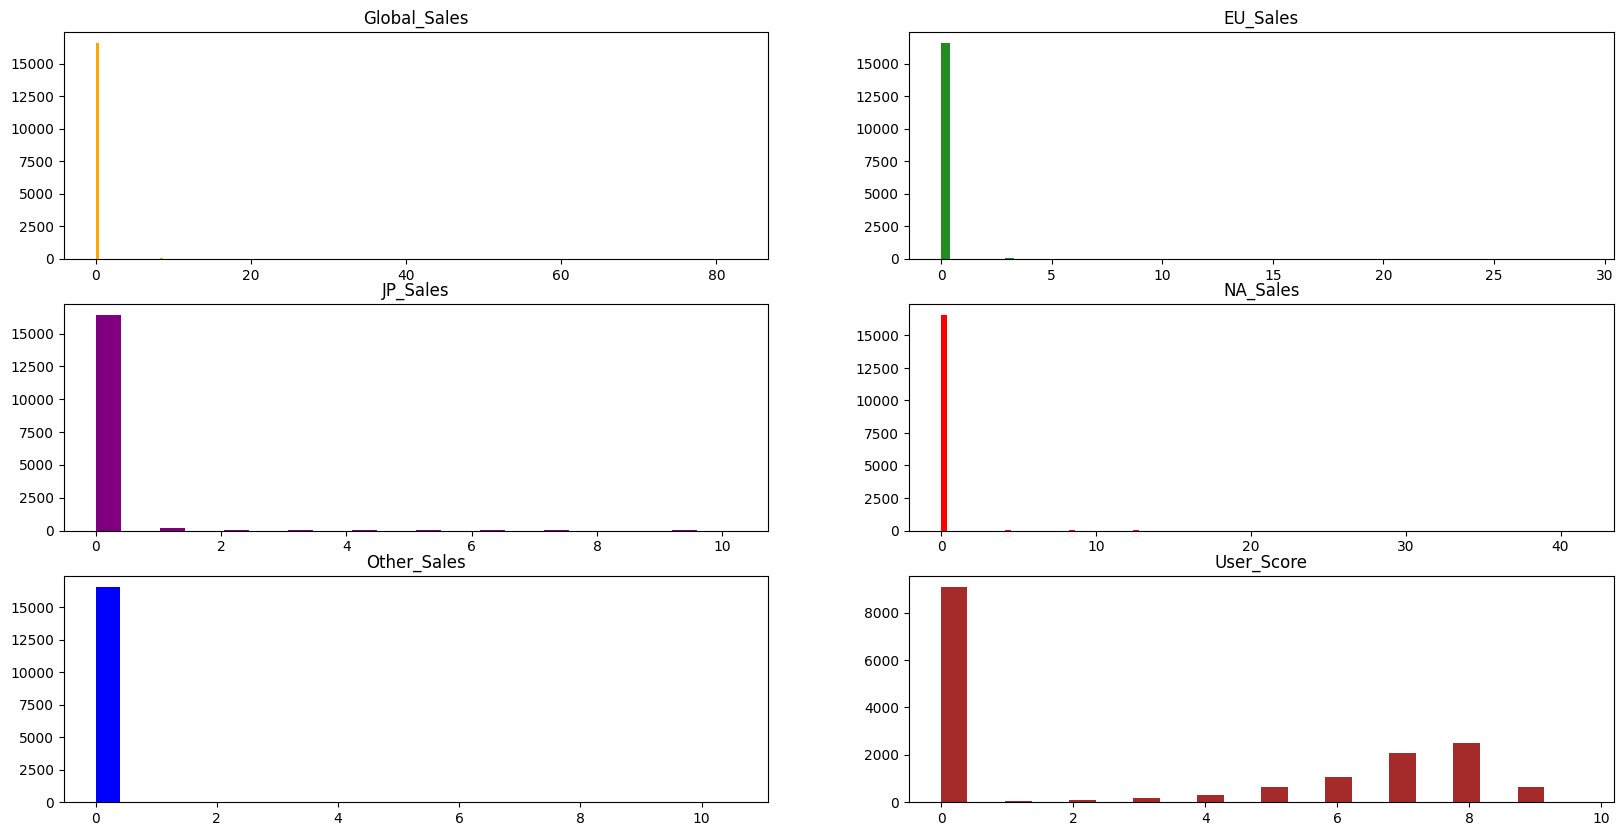

In [29]:
fig, axes = plt.subplots(3, 2, figsize=(20,10))

positions = {'Global_Sales': [0, 0], 'EU_Sales': [0, 1], 'JP_Sales': [1, 0], 'NA_Sales': [1, 1], 'Other_Sales': [2, 0], 'User_Score': [2, 1]}
colors = {'Global_Sales': 'orange', 'EU_Sales': 'forestgreen', 'JP_Sales': 'purple', 'NA_Sales': 'red', 'Other_Sales': 'blue', 'User_Score': 'brown'}

for column in colors:
    position = positions[column]
    axes[position[0], position[1]].set_title(column)
    axes[position[0], position[1]].hist(cleaned_data[column], color=colors[column], width=0.4)
plt.show()

In [30]:
new_dataset = cleaned_data.copy()
new_dataset.JP_Sales.replace({0: 0.001}, inplace=True)
new_dataset.NA_Sales.replace({0: 0.001}, inplace=True)
new_dataset.EU_Sales.replace({0: 0.001}, inplace=True)

new_dataset.Global_Sales.replace({0: 0.001}, inplace=True)
new_dataset.Other_Sales.replace({0: 0.001}, inplace=True)

new_dataset.JP_Sales = np.log(new_dataset.JP_Sales)
new_dataset.NA_Sales = np.log(new_dataset.NA_Sales)
new_dataset.EU_Sales = np.log(new_dataset.EU_Sales)

new_dataset.Global_Sales = np.log(new_dataset.Global_Sales)
new_dataset.Other_Sales = np.log(new_dataset.Other_Sales)

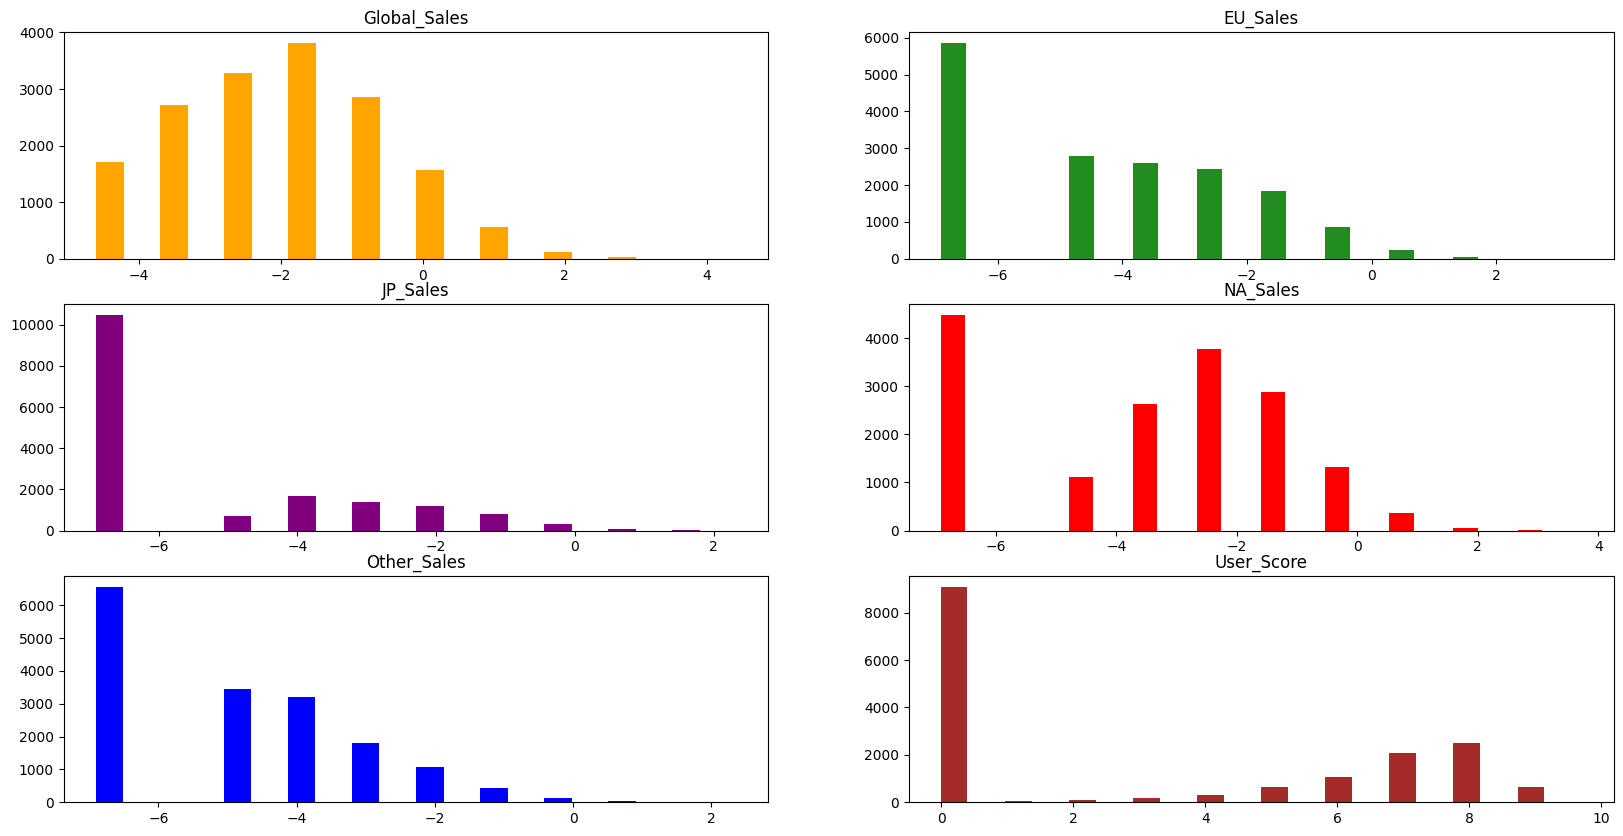

In [31]:
fig, axes = plt.subplots(3, 2, figsize=(20,10))

positions = {'Global_Sales': [0, 0], 'EU_Sales': [0, 1], 'JP_Sales': [1, 0], 'NA_Sales': [1, 1], 'Other_Sales': [2, 0], 'User_Score': [2, 1]}
colors = {'Global_Sales': 'orange', 'EU_Sales': 'forestgreen', 'JP_Sales': 'purple', 'NA_Sales': 'red', 'Other_Sales': 'blue', 'User_Score': 'brown'}

for column in colors:
    position = positions[column]
    axes[position[0], position[1]].set_title(column)
    axes[position[0], position[1]].hist(new_dataset[column], color=colors[column], width=0.4)
plt.show()

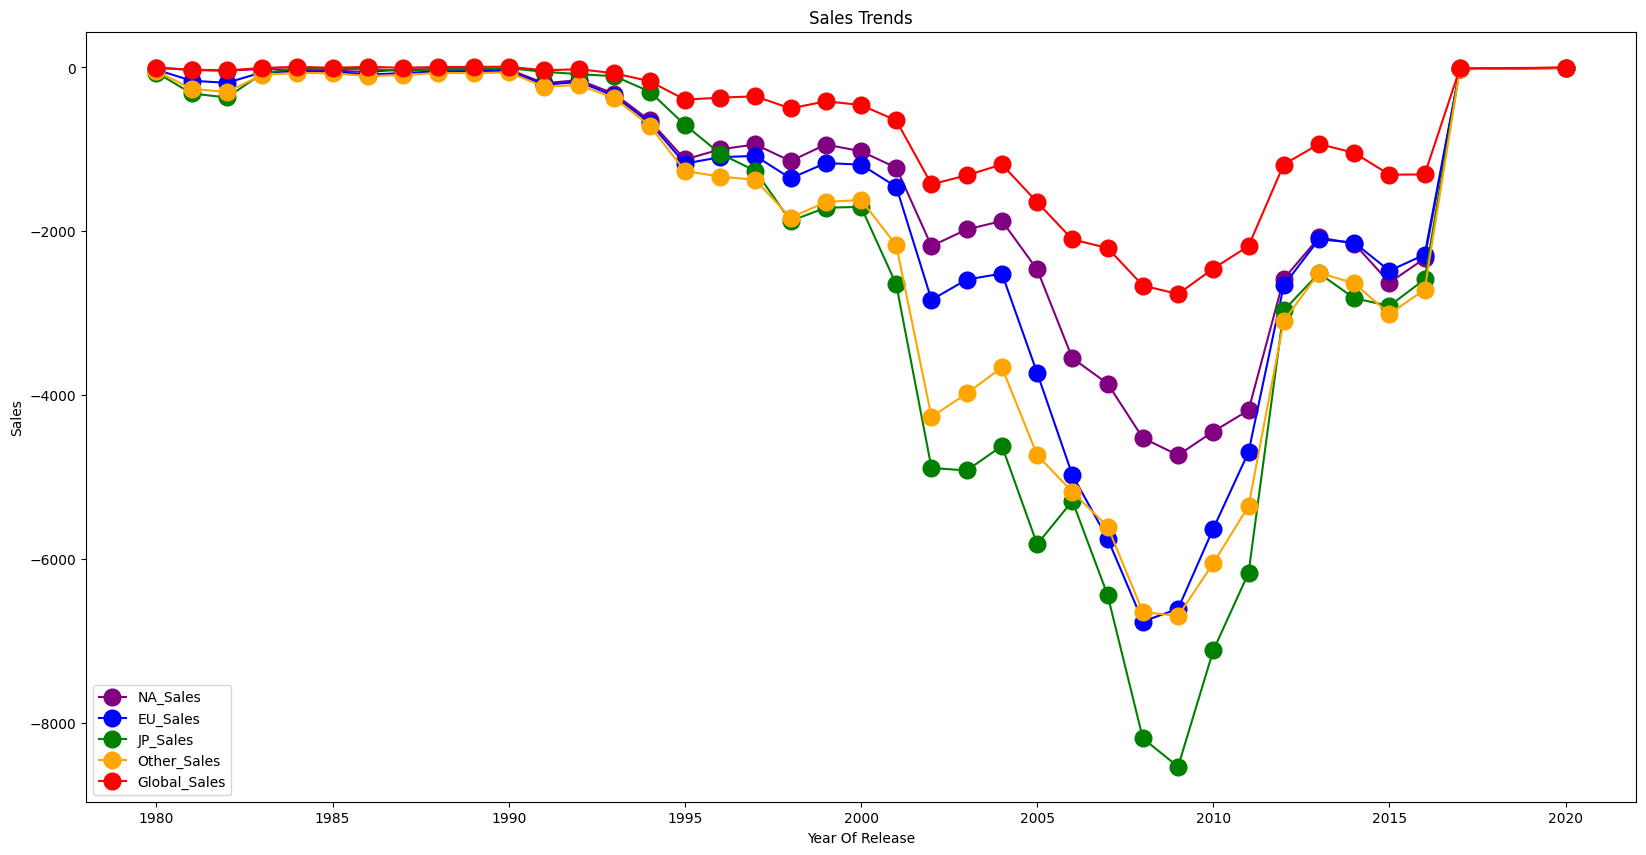

In [32]:
fig, ax = plt.subplots(figsize=(20,10))
grouped_data = new_dataset.groupby('Year_of_Release').sum(numeric_only=True).reset_index()

columns = {'NA_Sales': 'purple', 'EU_Sales': 'blue', 'JP_Sales': 'green', 'Other_Sales': 'orange', 'Global_Sales': 'red'}

for column in columns:
    plt.plot(grouped_data['Year_of_Release'], grouped_data[column], color=columns[column], markersize=12, marker='o')

plt.title('Sales Trends')
plt.xlabel('Year Of Release')
plt.ylabel('Sales')
plt.legend(columns.keys())
plt.show()

In [33]:
cleaned_data.columns

Index(['Platform', 'Year_of_Release', 'Genre', 'Publisher', 'NA_Sales',
       'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales', 'Critic_Score',
       'User_Score', 'Rating'],
      dtype='object')

### Convert categorical variable into dummy/indicator variables

In [34]:
cleaned_data = pd.get_dummies(cleaned_data)

In [35]:
x = cleaned_data.drop(columns=['NA_Sales', 'EU_Sales', 'Global_Sales', 'Other_Sales', 'JP_Sales'], axis = 1)
y = cleaned_data.NA_Sales

<div class="alert alert-block alert-danger">
<b>The Prediction</b> I will be predicting the NA_Sales. The other sales columns are being dropped so that model doesn't just substact from Global Sales and be dumb :)
</div>

In [36]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.6)

In [37]:
x_train.head()

,Year_of_Release,Critic_Score,User_Score,Rating,Platform_2600,Platform_3DO,Platform_3DS,Platform_DC,Platform_DS,Platform_GB,...,Publisher_Zushi Games,Publisher_bitComposer Games,Publisher_dramatic create,Publisher_fonfun,Publisher_iWin,Publisher_id Software,Publisher_imageepoch Inc.,Publisher_inXile Entertainment,"Publisher_mixi, Inc",Publisher_responDESIGN
4992,1994,13.0,0.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
11369,2006,69.0,6.8,3,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6294,2014,78.0,7.6,3,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2983,2005,13.0,0.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
11584,2016,60.0,6.7,2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Model Building and Evaluation

In [38]:
results = pd.DataFrame(columns=['Methodology', 'MSE'])
results

,Methodology,MSE


<div class="alert alert-block alert-success">
    <center><b>THE LEARNING</b></center>
</div>

### Linear Regression using Gradient Descent

<div class="alert alert-block alert-warning">
Gradient descent is a first-order iterative optimization algorithm for finding the minimum
of a function. The gradient descent algorithm then calculates the gradient of the loss curve
at the starting point.
</div>

In [39]:
from sklearn.linear_model import LinearRegression
linreg = LinearRegression(fit_intercept=True)
linreg.fit(x_train, y_train)

LinearRegression()

In [40]:
y_train_predicted = linreg.predict(x_train)
y_test_predicted = linreg.predict(x_test)

In [41]:
from sklearn.metrics import mean_squared_error, r2_score

train_mse = mean_squared_error(y_train, y_train_predicted)
test_mse = mean_squared_error(y_test, y_test_predicted)

f'Train MSE: {train_mse}\nTest MSE: {test_mse}'

'Train MSE: 0.5558279585593382\nTest MSE: 1.7965193748475917e+18'

In [42]:
r2_score(y_test, y_test_predicted)

-2.651633162326729e+18

In [43]:
results = results.append({'Methodology': 'Linear Regression', 'MSE': test_mse}, ignore_index = True)

### Ridge Regression

<div class="alert alert-block alert-warning">
Ridge Regression is used to prevent overfitting which may result from simple linear
regression. In ridge regression, the cost function is altered by adding a penalty equivalent
to the square of the magnitude of the coefficients.
</div>

In [44]:
from sklearn.linear_model import Ridge
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

ridge = make_pipeline(StandardScaler(with_mean=False), Ridge(alpha=0.001))
ridge.fit(x_train, y_train)
ridge_predictions = ridge.predict(x_test)

In [45]:
mse = mean_squared_error(y_test, ridge_predictions)
f'Test MSE (Ridge Regression): {mse}'

'Test MSE (Ridge Regression): 0.5848810026828515'

In [46]:
r2_score(y_test, ridge_predictions)

0.13672522298273138

In [47]:
results = results.append({'Methodology': 'Ridge Regression', 'MSE': mse}, ignore_index=True)

### Lasso Regression

<div class="alert alert-block alert-warning">
Lasso Regression is used to prevent overfitting which may result from simple linear
regression. It is also used for feature selection.
</div>

In [48]:
from sklearn.linear_model import Lasso
lasso = Lasso(alpha=0.001)

lasso.fit(x_train, y_train)
lasso_predictions = lasso.predict(x_test)

In [49]:
mse = mean_squared_error(y_test, lasso_predictions)
f'Test MSE (Lasso Regression): {mse}'

'Test MSE (Lasso Regression): 0.5880258663308235'

In [50]:
results = results.append({'Methodology': 'Lasso Regression', 'MSE': mse}, ignore_index=True)

### Polynomial Regression

<div class="alert alert-block alert-warning">
Polynomial regression is a form of regression analysis in which the relationship between the independent variable x and the dependent variable y is modeled as an nth degree polynomial in x.
</div>

In [51]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=2)
x_ = poly.fit_transform(x_train)
x_test_ = poly.fit_transform(x_test)

In [52]:
lg = LinearRegression()
lg.fit(x_, y_train)
lg_predictions = lg.predict(x_test_)

mse = mean_squared_error(y_test, lg_predictions)
r2 = r2_score(y_test, lg_predictions)

print(mse, r2)

429083779263203.75 -633320627898775.0


### Bayesian Regression

<div class="alert alert-block alert-warning">
Bayesian linear regression is an approach to linear regression in which the statistical analysis is undertaken within the context of Bayesian inference. When the regression model has errors that have a normal distribution, and if a particular form of prior distribution is assumed, explicit results are available for the posterior probability distributions of the model's parameters.
</div>

In [53]:
from sklearn.linear_model import BayesianRidge
br = BayesianRidge()
br.fit(x_train, y_train)
br_predictions = br.predict(x_test)

In [54]:
mse = mean_squared_error(y_test, br_predictions)
r2 = r2_score(y_test, br_predictions)

print(mse, r2)

0.5884536364297872 0.13145207410782644


### Results

In [55]:
def create_figure():
    fig = plt.figure(figsize=(20, 15))

    gs = fig.add_gridspec(3,2)
    ax1 = fig.add_subplot(gs[0, 0])
    ax2 = fig.add_subplot(gs[0, 1])
    ax3 = fig.add_subplot(gs[1, 0])
    ax4 = fig.add_subplot(gs[1, 1])
    ax5 = fig.add_subplot(gs[2, 0])
    ax6 = fig.add_subplot(gs[2, 1])
    
    return (ax1, ax2, ax3, ax4, ax5, ax6)

In [58]:
ax_mapping = [{'title': 'Actual Data',
                        'data': y_test,
                        'color': 'orange'
                       },
              {'title': 'Linear Regression',
                        'data': y_test_predicted,
                        'color': 'forestgreen'
                       },
              {'title': 'Ridge Regression',
                        'data': ridge_predictions,
                        'color': 'purple'
                       },
              {'title': 'Lasso Regression',
                        'data': lasso_predictions,
                        'color': 'red'
                       },
              {'title': 'Polynomial Regression',
                        'data': lg_predictions,
                        'color': 'blue'
                       },
              {'title': 'Bayesian Regression',
                        'data': br_predictions,
                        'color': 'brown'
                       }]

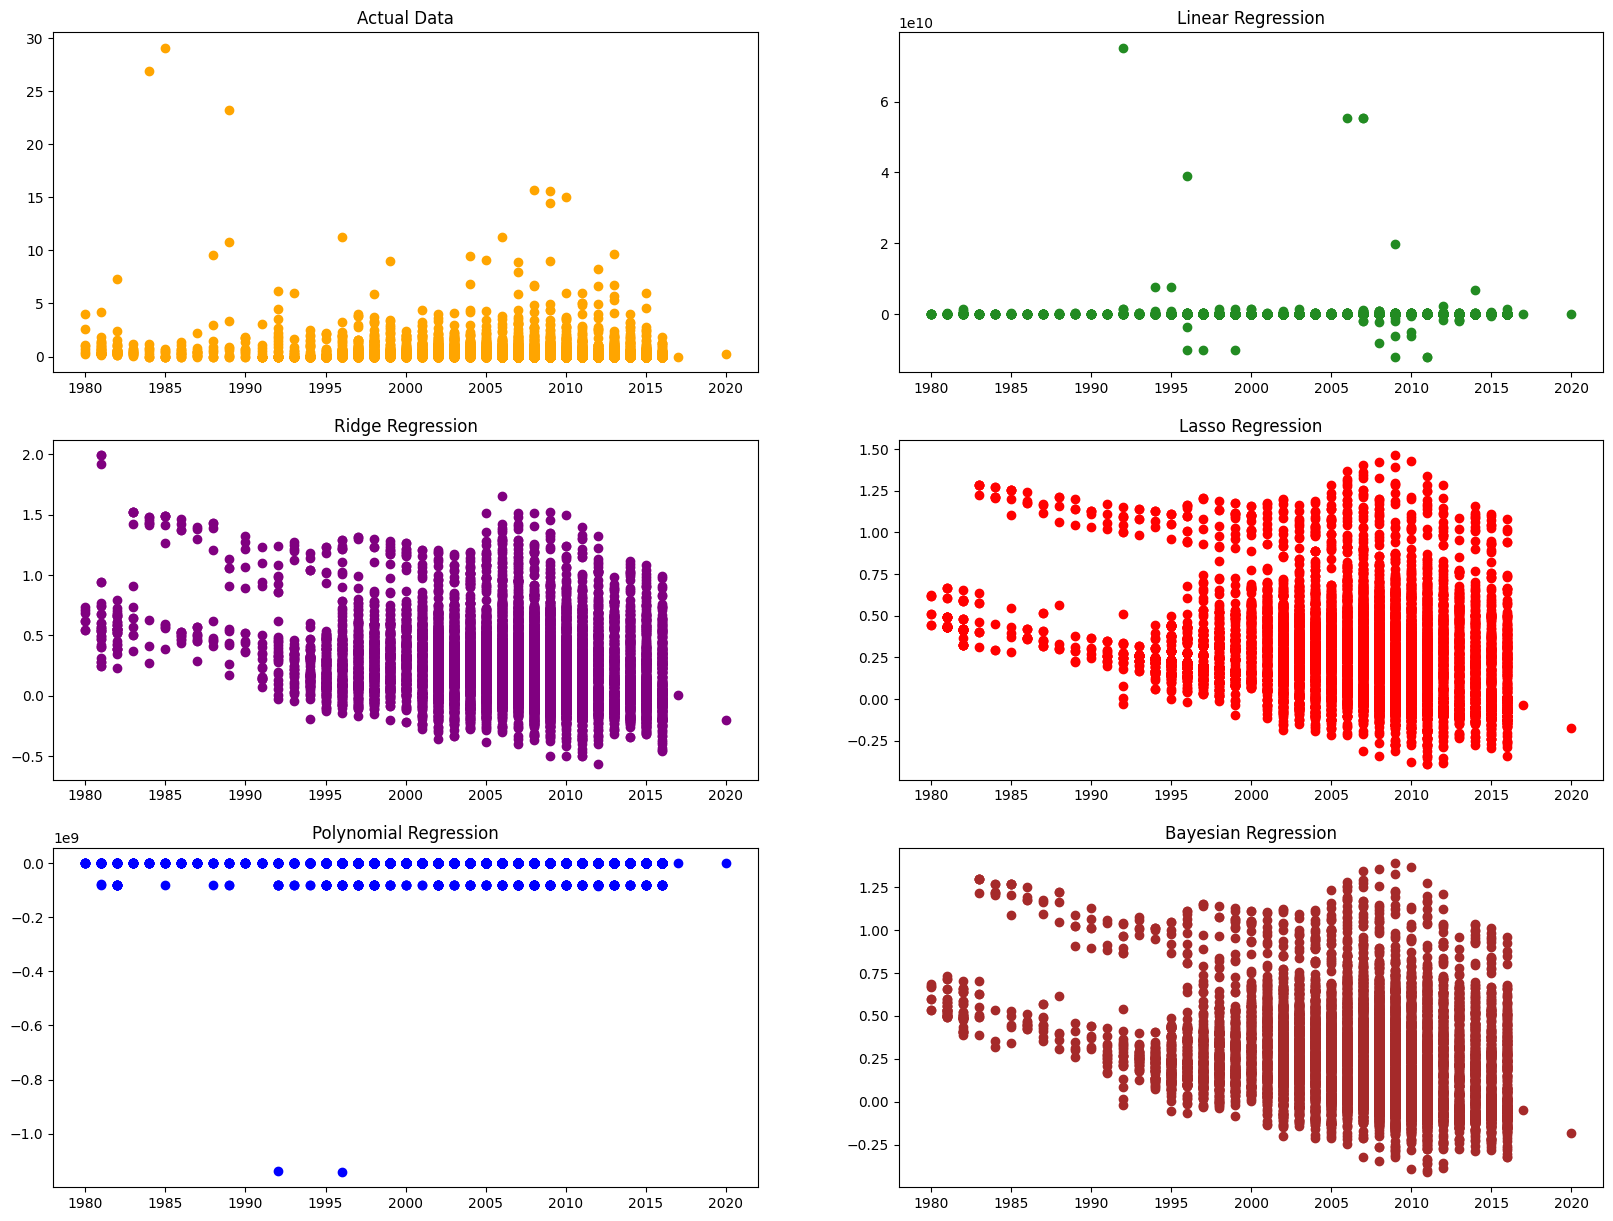

In [62]:
axes = create_figure()
for ax in range(6):
    column = ax_mapping[ax]['title']
    data = ax_mapping[ax]['data']
    color = ax_mapping[ax]['color']
    axes[ax].set_title(column)
    axes[ax].scatter(x_test['Year_of_Release'], data, marker='o', color=color)

plt.show()

In [67]:
grouped_data = pd.DataFrame()
grouped_data['Year_of_Release'] = x_test['Year_of_Release']

for ax in ax_mapping:
    grouped_data[ax['title']] = ax['data']

grouped_data = grouped_data.set_index('Year_of_Release')
grouped_data.sort_values(by='Year_of_Release')

final_data = grouped_data.groupby(['Year_of_Release']).sum().reset_index()

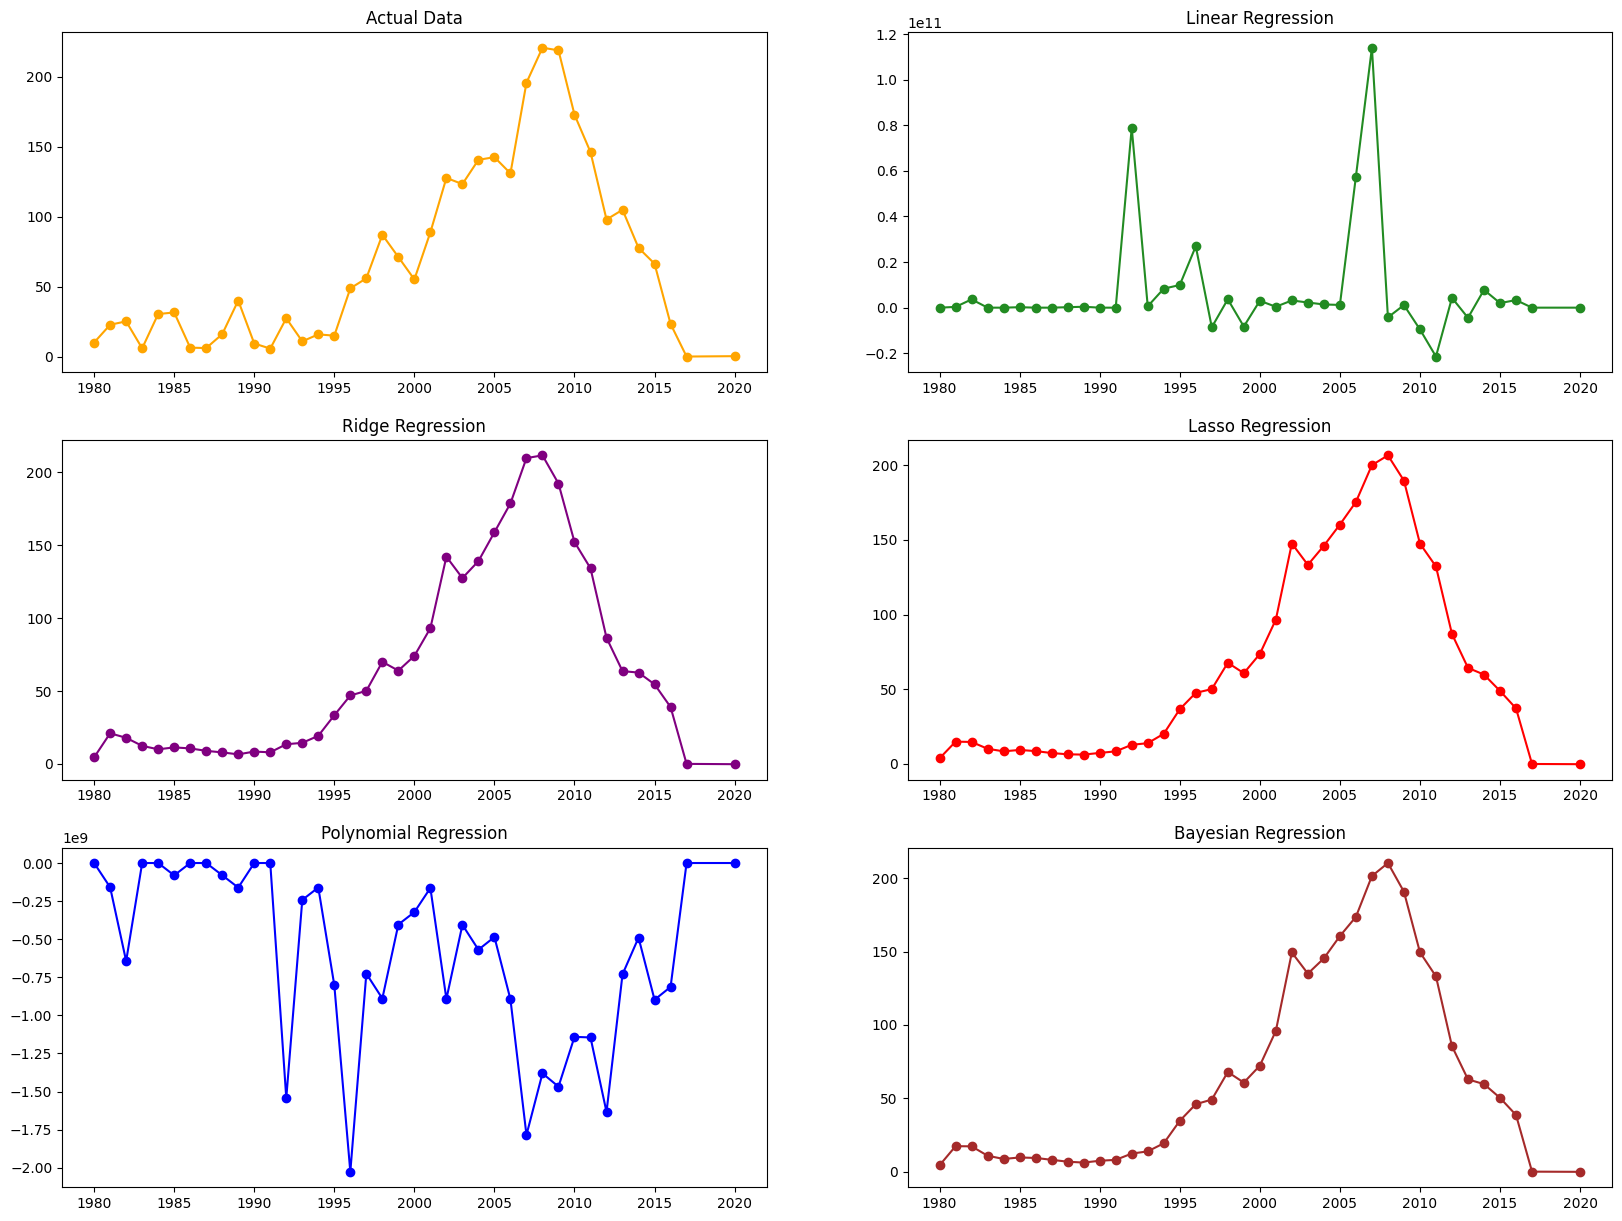

In [68]:
axes = create_figure()

for ax in range(6):
    column = ax_mapping[ax]['title']
    color = ax_mapping[ax]['color']
    axes[ax].set_title(column)
    axes[ax].plot(final_data['Year_of_Release'], final_data[column], markersize=6, marker='o', color=color)

plt.show()

### With Log-transformed Data

In [69]:
cleaned_data = pd.get_dummies(new_dataset)

In [70]:
new_dataset.columns

Index(['Platform', 'Year_of_Release', 'Genre', 'Publisher', 'NA_Sales',
       'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales', 'Critic_Score',
       'User_Score', 'Rating'],
      dtype='object')

In [71]:
x = cleaned_data.drop(columns=['NA_Sales', 'EU_Sales', 'Global_Sales', 'Other_Sales', 'JP_Sales'], axis = 1)
y = cleaned_data.NA_Sales

In [72]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.6)

In [73]:
x_train.head()

,Year_of_Release,Critic_Score,User_Score,Rating,Platform_2600,Platform_3DO,Platform_3DS,Platform_DC,Platform_DS,Platform_GB,...,Publisher_Zushi Games,Publisher_bitComposer Games,Publisher_dramatic create,Publisher_fonfun,Publisher_iWin,Publisher_id Software,Publisher_imageepoch Inc.,Publisher_inXile Entertainment,"Publisher_mixi, Inc",Publisher_responDESIGN
9142,2011,13.0,0.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5196,1997,13.0,0.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
14292,2010,13.0,0.0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3770,1993,13.0,0.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4482,2014,13.0,0.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Model Building and Evaluation

In [74]:
results = pd.DataFrame(columns=['Methodology', 'MSE'])
results

,Methodology,MSE


### Linear Regression using Gradient Descent

In [75]:
from sklearn.linear_model import LinearRegression
linreg = LinearRegression(fit_intercept=True)
linreg.fit(x_train, y_train)

LinearRegression()

In [76]:
y_train_predicted = linreg.predict(x_train)
y_test_predicted = linreg.predict(x_test)

In [77]:
from sklearn.metrics import mean_squared_error, r2_score

train_mse = mean_squared_error(y_train, y_train_predicted)
test_mse = mean_squared_error(y_test, y_test_predicted)

f'Train MSE: {train_mse}\nTest MSE: {test_mse}'

'Train MSE: 2.431904974813065\nTest MSE: 5.623161402674111e+20'

In [78]:
r2_score(y_test, y_test_predicted)

-9.163675251706156e+19

In [79]:
results = results.append({'Methodology': 'Linear Regression', 'MSE': test_mse}, ignore_index = True)

### Ridge Regression

In [80]:
from sklearn.linear_model import Ridge
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

ridge = make_pipeline(StandardScaler(with_mean=False), Ridge(alpha=0.001))
ridge.fit(x_train, y_train)
ridge_predictions = ridge.predict(x_test)

In [81]:
mse = mean_squared_error(y_test, ridge_predictions)
f'Test MSE (Ridge Regression): {mse}'

'Test MSE (Ridge Regression): 2.7803075004036364'

In [82]:
r2_score(y_test, ridge_predictions)

0.5469126135795116

In [83]:
results = results.append({'Methodology': 'Ridge Regression', 'MSE': mse}, ignore_index=True)

### Lasso Regression

In [84]:
from sklearn.linear_model import Lasso
lasso = Lasso(alpha=0.001)

lasso.fit(x_train, y_train)
lasso_predictions = lasso.predict(x_test)

In [85]:
mse = mean_squared_error(y_test, lasso_predictions)
f'Test MSE (Lasso Regression): {mse}'

'Test MSE (Lasso Regression): 2.8058409652966176'

In [86]:
results = results.append({'Methodology': 'Lasso Regression', 'MSE': mse}, ignore_index=True)

### Polynomial Regression

In [87]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=2)
x_ = poly.fit_transform(x_train)
x_test_ = poly.fit_transform(x_test)

In [88]:
lg = LinearRegression()
lg.fit(x_, y_train)
lg_predictions = lg.predict(x_test_)

mse = mean_squared_error(y_test, lg_predictions)
r2 = r2_score(y_test, lg_predictions)

print(mse, r2)

11192668106274.797 -1823991317005.4016


### Bayesian Regression

In [89]:
from sklearn.linear_model import BayesianRidge
br = BayesianRidge()
br.fit(x_train, y_train)
br_predictions = br.predict(x_test)

In [90]:
mse = mean_squared_error(y_test, br_predictions)
r2 = r2_score(y_test, br_predictions)

print(mse, r2)

2.7372384706845785 0.553931273964466


### Results

In [91]:
ax_mapping = [{'title': 'Actual Data',
                        'data': y_test,
                        'color': 'orange'
                       },
              {'title': 'Linear Regression',
                        'data': y_test_predicted,
                        'color': 'forestgreen'
                       },
              {'title': 'Ridge Regression',
                        'data': ridge_predictions,
                        'color': 'purple'
                       },
              {'title': 'Lasso Regression',
                        'data': lasso_predictions,
                        'color': 'red'
                       },
              {'title': 'Polynomial Regression',
                        'data': lg_predictions,
                        'color': 'blue'
                       },
              {'title': 'Bayesian Regression',
                        'data': br_predictions,
                        'color': 'brown'
                       }]

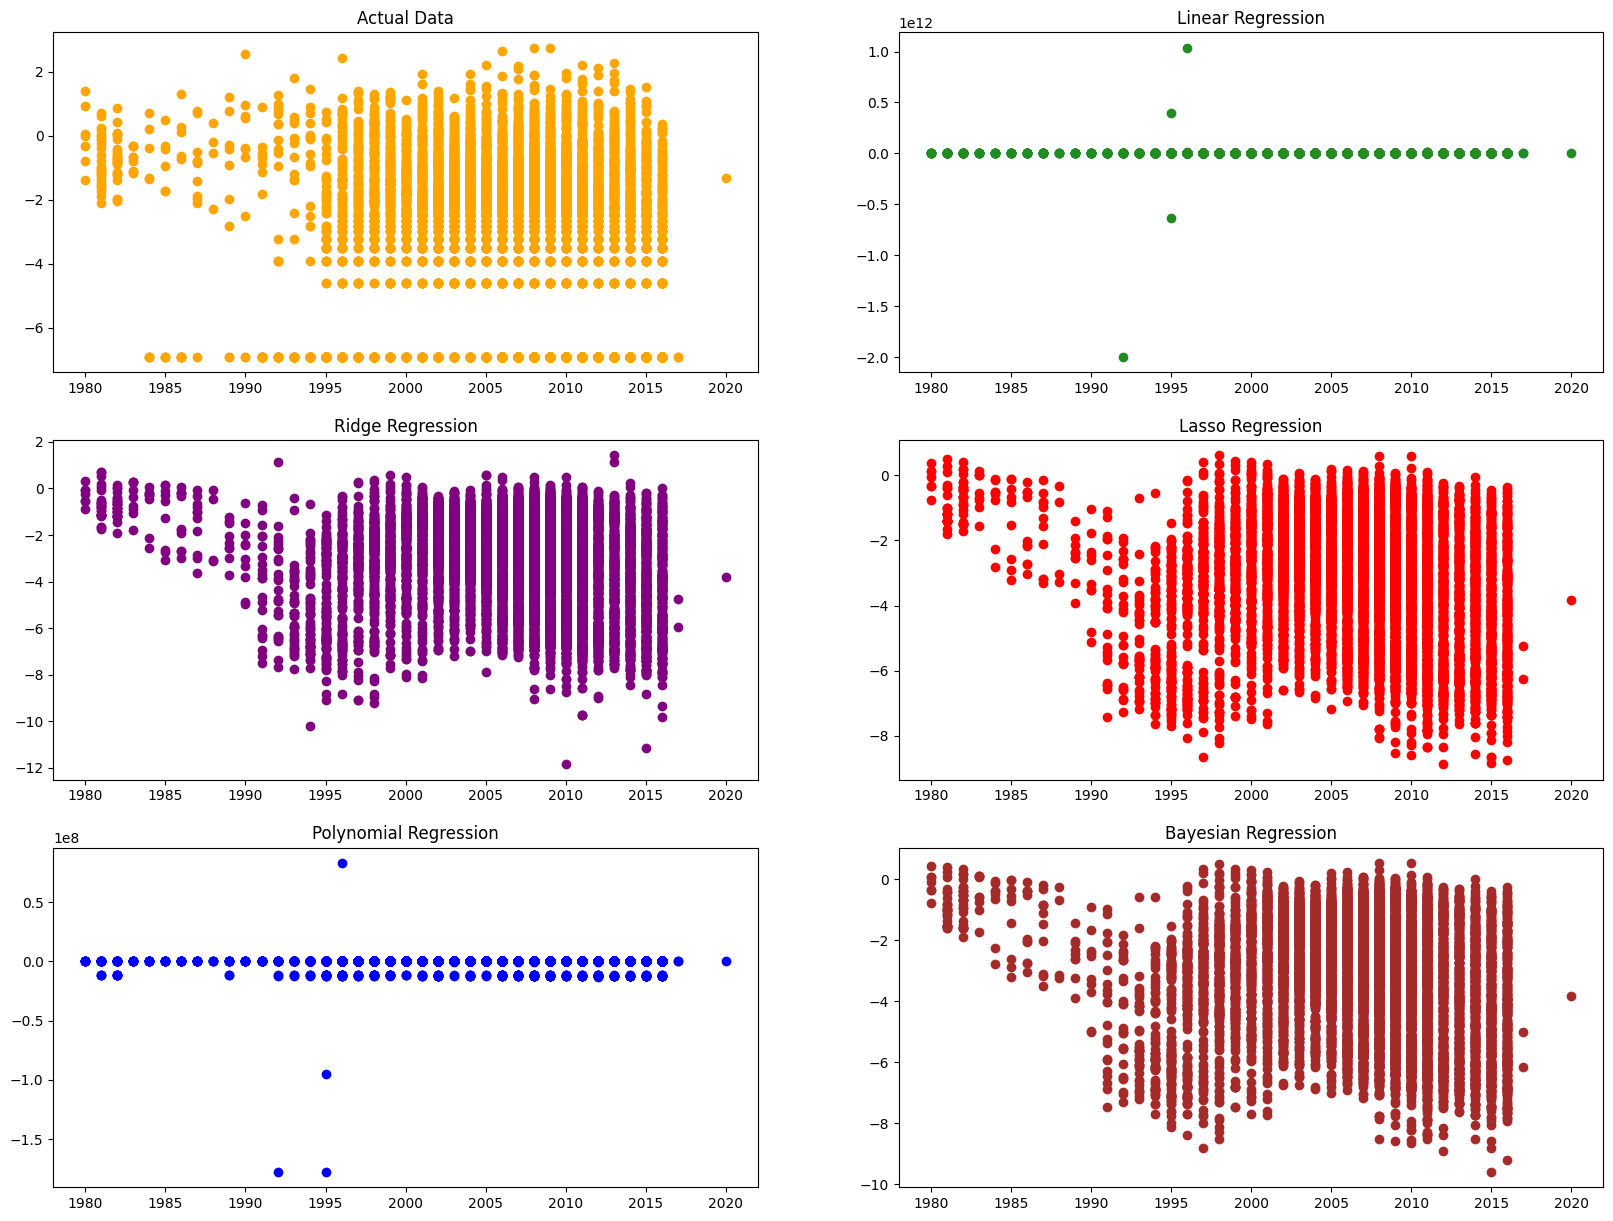

In [92]:
axes = create_figure()
for ax in range(6):
    column = ax_mapping[ax]['title']
    data = ax_mapping[ax]['data']
    color = ax_mapping[ax]['color']
    axes[ax].set_title(column)
    axes[ax].scatter(x_test['Year_of_Release'], data, marker='o', color=color)

plt.show()

In [93]:
grouped_data = pd.DataFrame()
grouped_data['Year_of_Release'] = x_test['Year_of_Release']

for ax in ax_mapping:
    grouped_data[ax['title']] = ax['data']

grouped_data = grouped_data.set_index('Year_of_Release')
grouped_data.sort_values(by='Year_of_Release')

final_data = grouped_data.groupby(['Year_of_Release']).sum().reset_index()

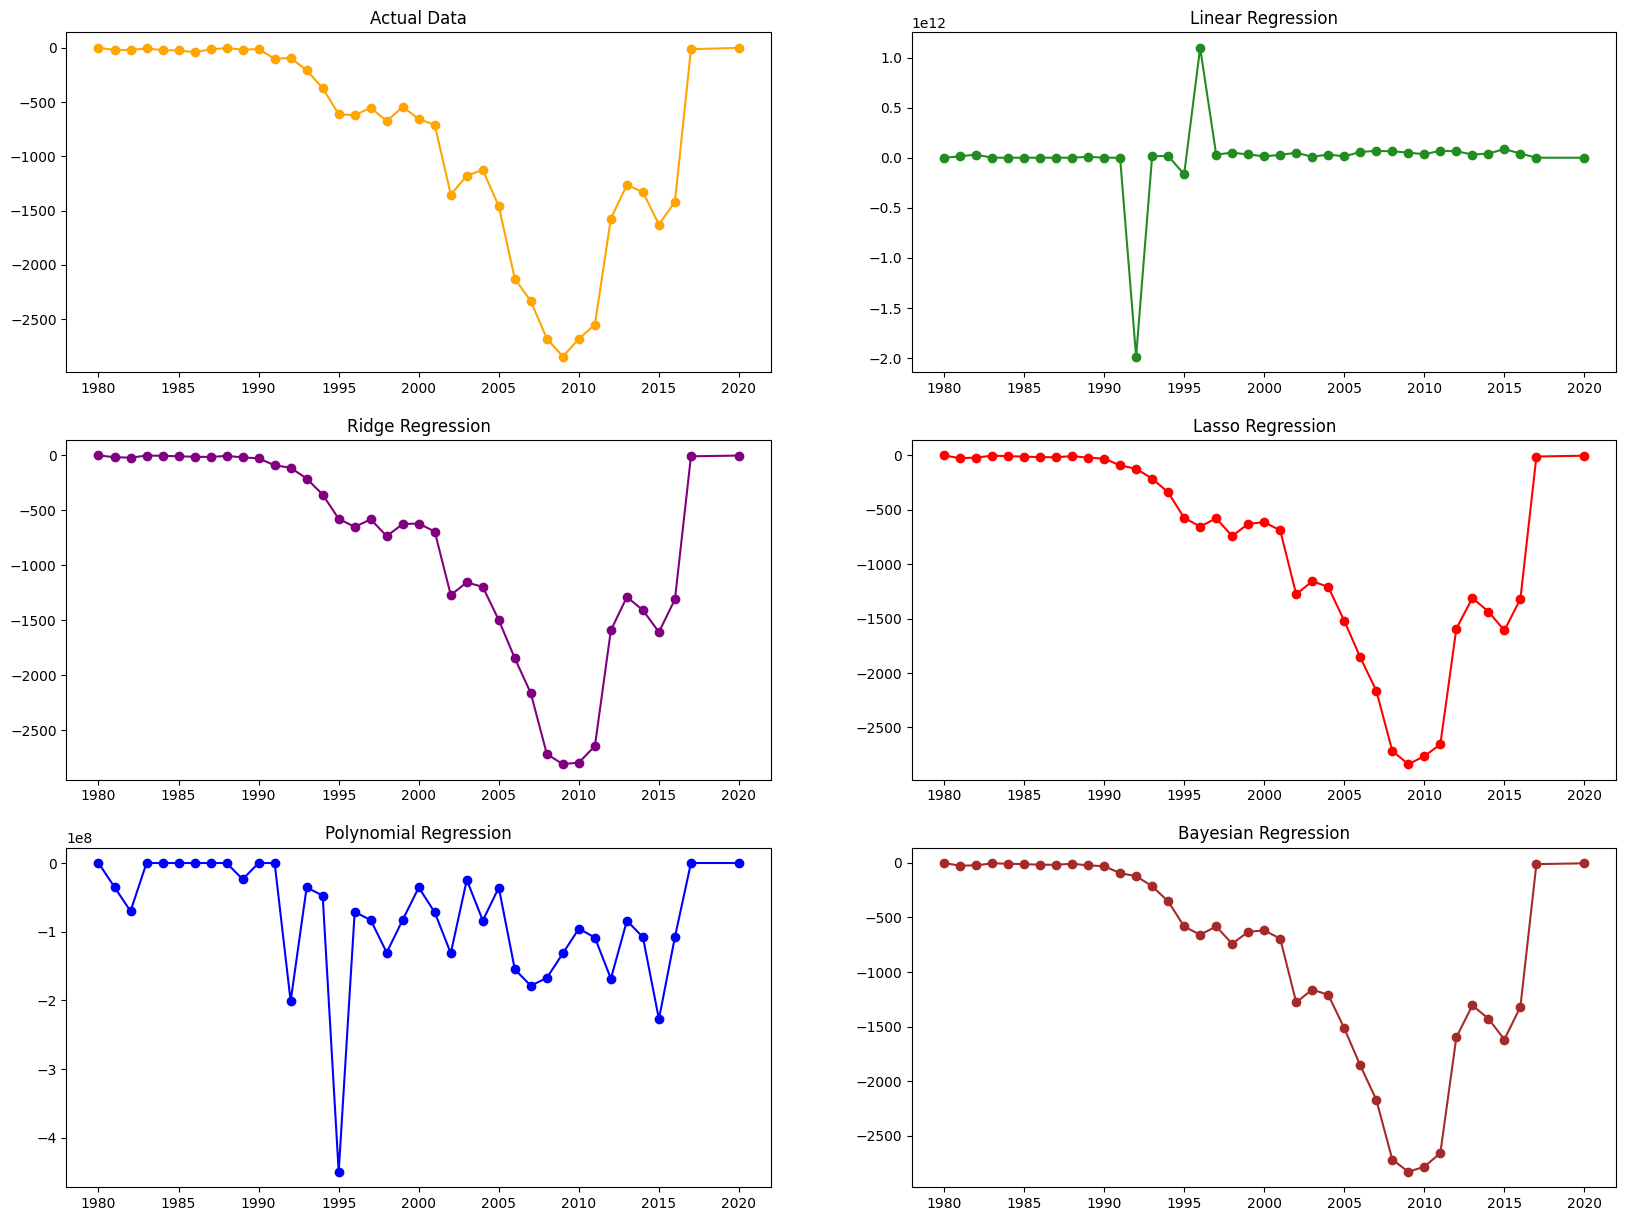

In [94]:
axes = create_figure()

for ax in range(6):
    column = ax_mapping[ax]['title']
    color = ax_mapping[ax]['color']
    axes[ax].set_title(column)
    axes[ax].plot(final_data['Year_of_Release'], final_data[column], markersize=6, marker='o', color=color)

plt.show()

In [105]:
ax_mapping = [{'title': 'Actual Data',
                        'data': pd.Series(y_test).apply(lambda x: np.exp(x)),
                        'color': 'orange'
                       },
              {'title': 'Linear Regression',
                        'data': pd.Series(y_test_predicted).apply(lambda x: np.exp(x)),
                        'color': 'forestgreen'
                       },
              {'title': 'Ridge Regression',
                        'data': pd.Series(ridge_predictions).apply(lambda x: np.exp(x)),
                        'color': 'purple'
                       },
              {'title': 'Lasso Regression',
                        'data': pd.Series(lasso_predictions).apply(lambda x: np.exp(x)),
                        'color': 'red'
                       },
              {'title': 'Polynomial Regression',
                        'data': pd.Series(lg_predictions).apply(lambda x: np.exp(x)),
                        'color': 'blue'
                       },
              {'title': 'Bayesian Regression',
                        'data': pd.Series(br_predictions).apply(lambda x: np.exp(x)),
                        'color': 'brown'
                       }]

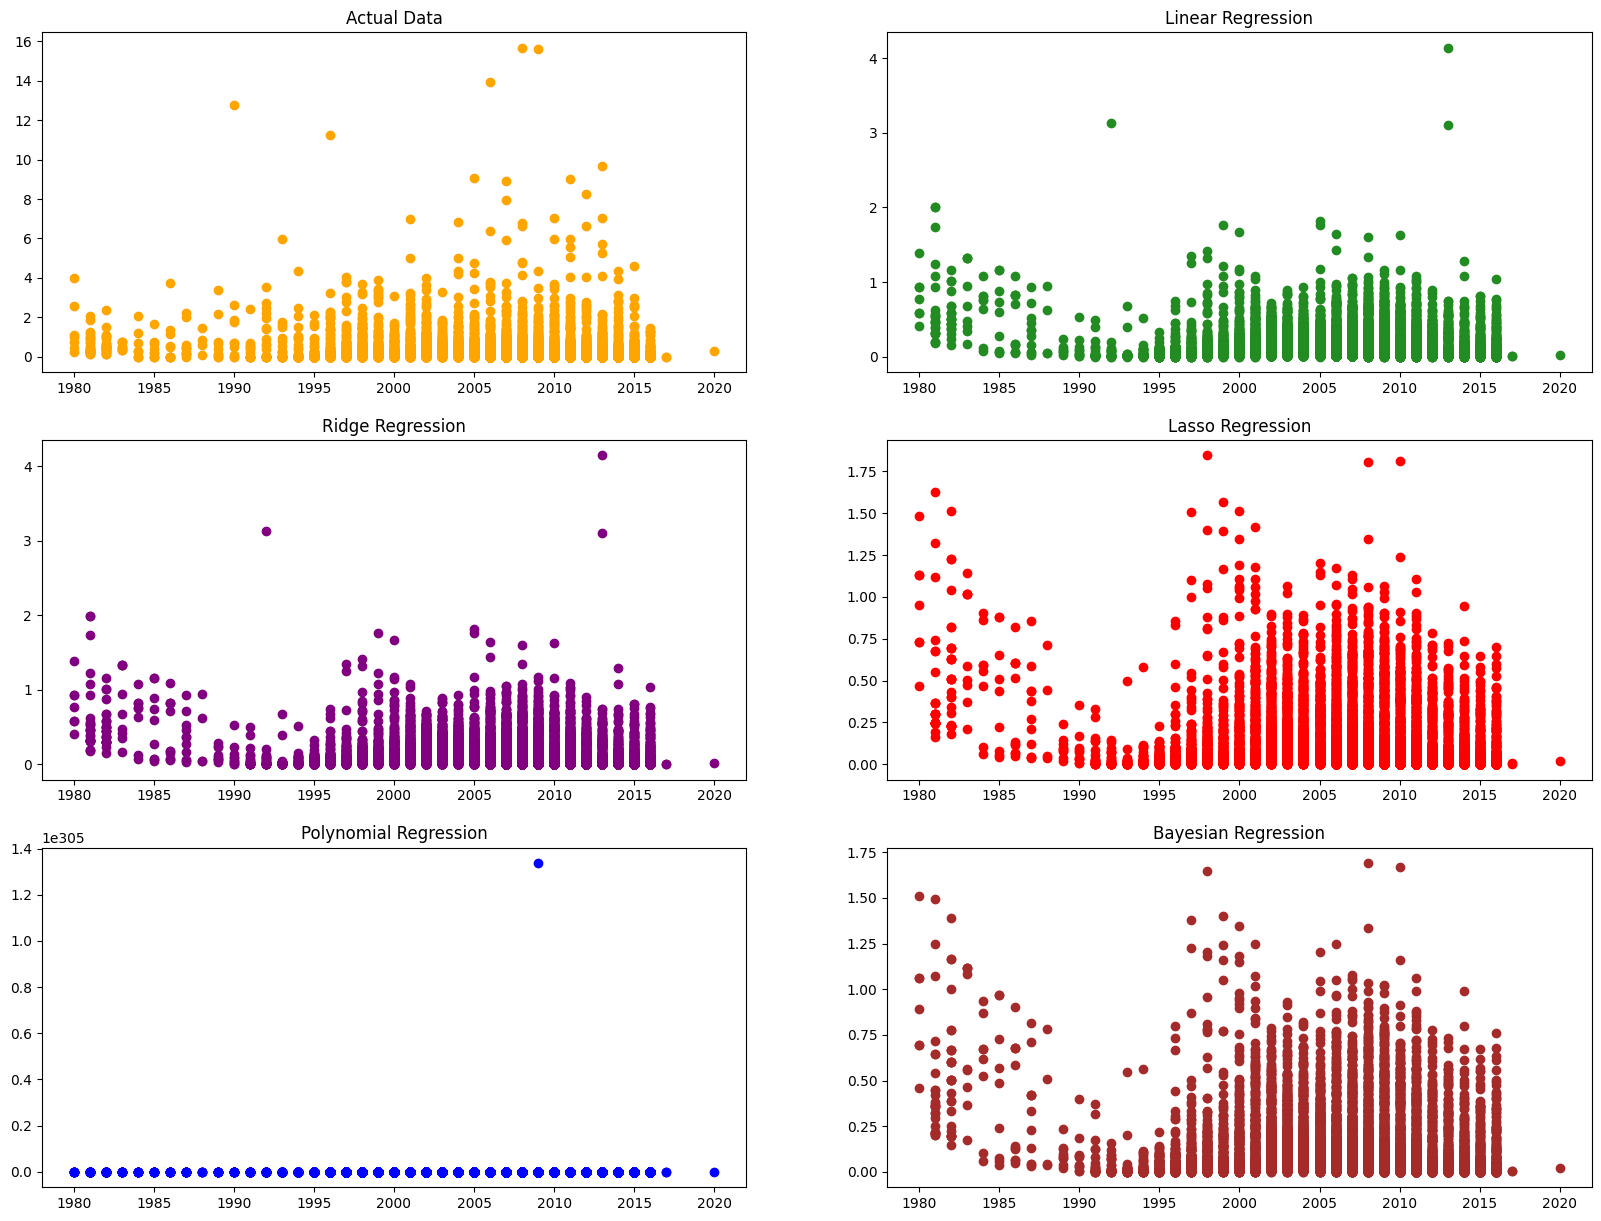

In [106]:
axes = create_figure()
for ax in range(6):
    column = ax_mapping[ax]['title']
    data = ax_mapping[ax]['data']
    color = ax_mapping[ax]['color']
    axes[ax].set_title(column)
    axes[ax].scatter(x_test['Year_of_Release'], data, marker='o', color=color)

plt.show()

In [101]:
grouped_data = pd.DataFrame()
grouped_data['Year_of_Release'] = x_test['Year_of_Release']

for ax in ax_mapping:
    grouped_data[ax['title']] = ax['data']

grouped_data = grouped_data.set_index('Year_of_Release')
grouped_data.sort_values(by='Year_of_Release')

final_data = grouped_data.groupby(['Year_of_Release']).sum().reset_index()

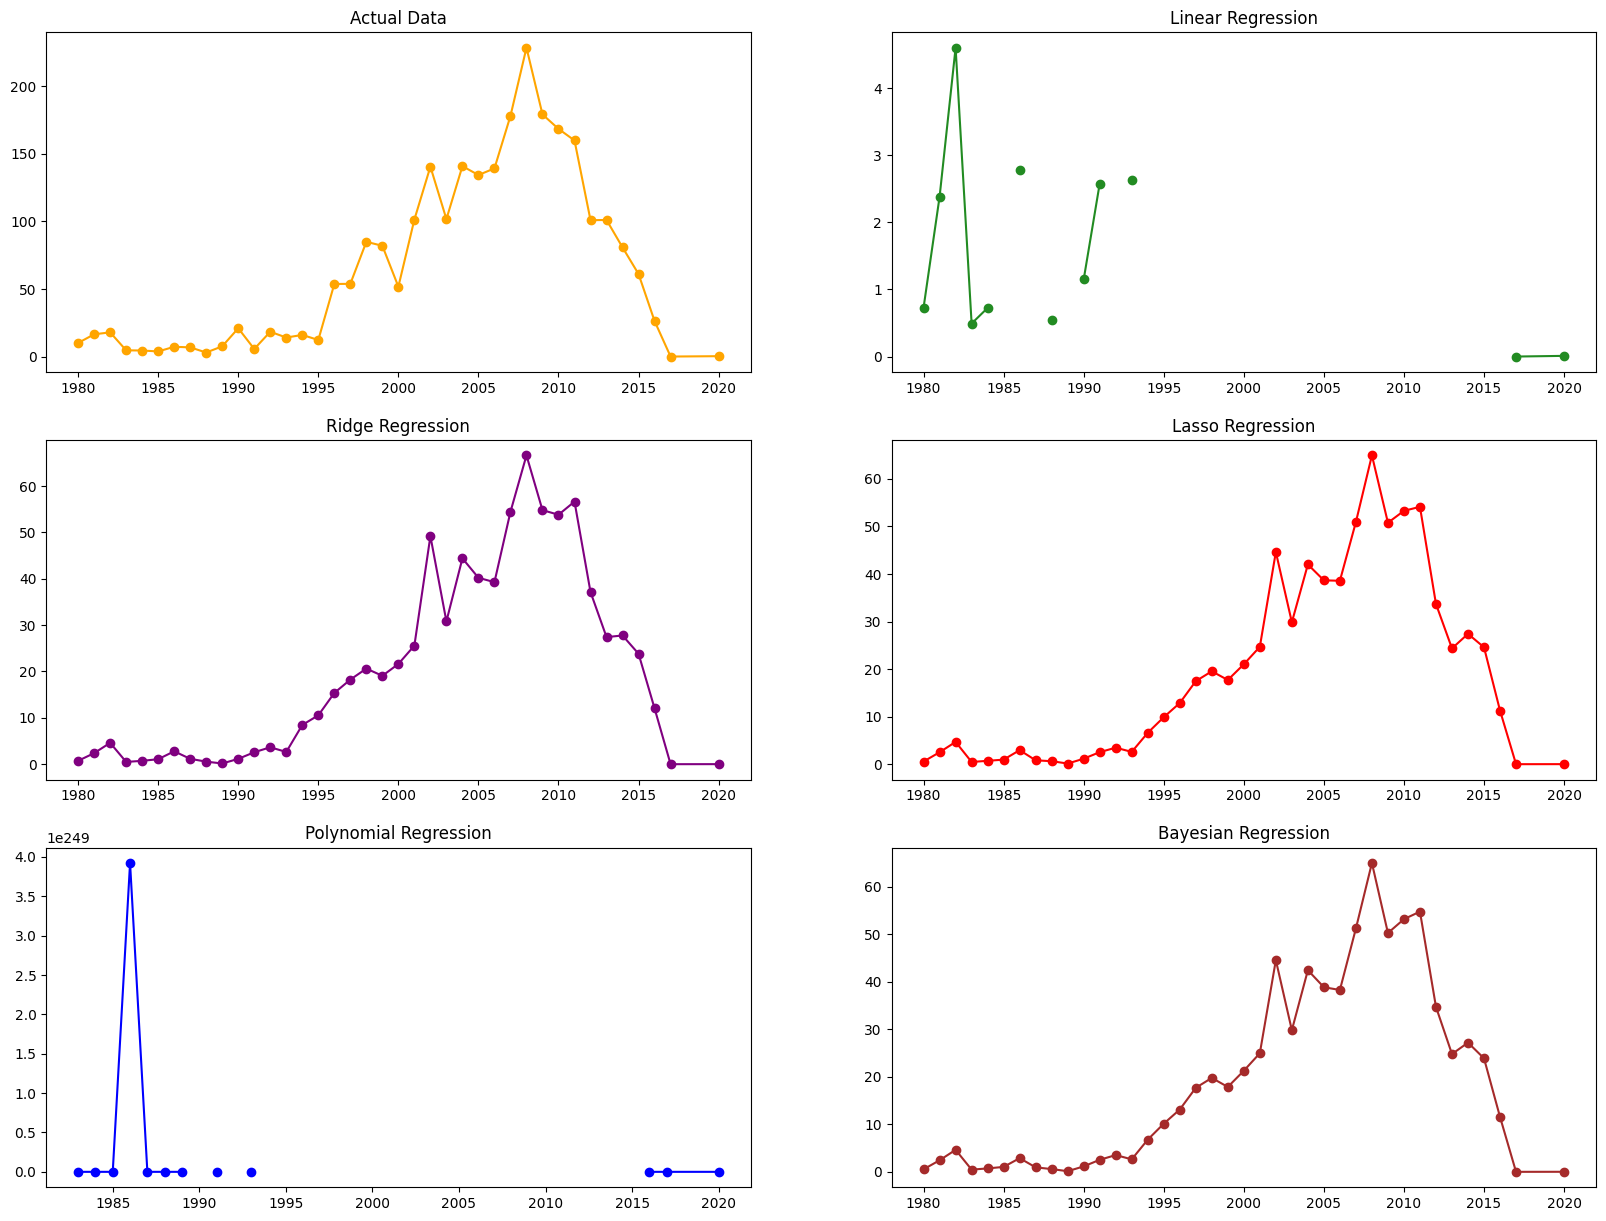

In [102]:
axes = create_figure()

for ax in range(6):
    column = ax_mapping[ax]['title']
    color = ax_mapping[ax]['color']
    axes[ax].set_title(column)
    axes[ax].plot(final_data['Year_of_Release'], final_data[column], markersize=6, marker='o', color=color)

plt.show()